# <center>第二部分——基于NRC词库词向量文件的情感分析运用与可视化数据</center>

## 〇、程序说明与应用背景

### 1、程序说明
- <font size=4> 在上一个文件中我们已经将NRC官网下载的分立情绪的NRC词典合并成为词语的情感向量——</font>
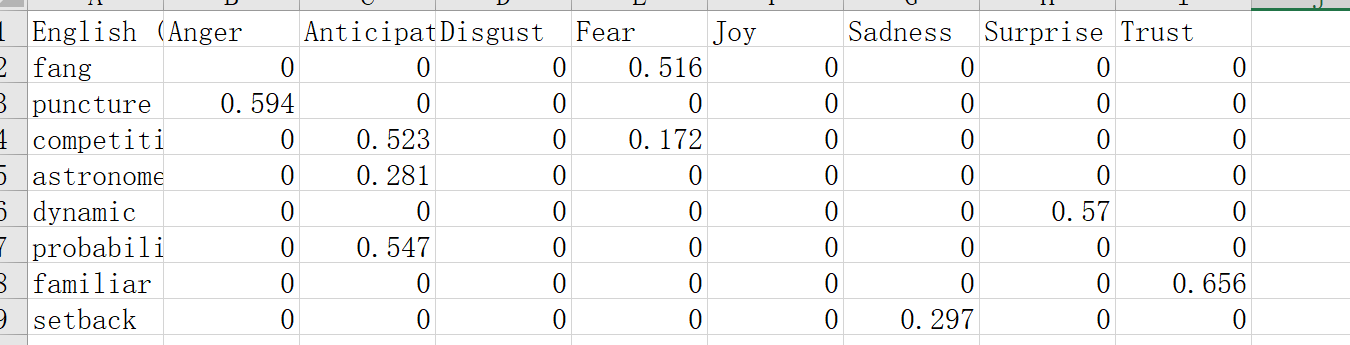
- <font size=4>运用上述合成的词语的情感向量，接下来我们将对具体文章进行情感分析。

### 2、数据来源与分析背景
- <font size=3>《你好，李焕英》是由贾玲执导奇幻喜剧电影，该片于2021年2月12日在中国内地春节档上映。凭借着打动人心的情节，在藏龙卧虎的春节档，《你好，李焕英》出人意料地成为票房黑马。 
    
- 3月14日，《你好，李焕英》片方宣布该片在全球上映。符合中国观众口味的电影是否能够博得国际审美的认可？于是我便从IMDB（IMDb是一个关于电影演员、电影、电视节目、电视明星和电影制作的在线数据库）上面找了十五篇影评进行情感分析
</font>

## 一、对excel表格的读取
- <font size=3>由于词语的情感向量储存在excle文件中，程序要多次引用xls文件，故定义将excel的内容转移到列表的函数open_excel(file_xls)

In [1]:
def open_excel(file_xls):#定义将excel的内容转移到列表的函数
    import xlsxwriter
    import xlrd
    wb = xlrd.open_workbook(file_xls)# 打开Excel文件
    sheet = wb.sheet_by_name('Sheet1')#通过excel表格名称(rank)获取工作表
    data = []  #创建空list作为目标文件
    
    #循环读取表格内容（每次读取一行数据）
    for r in range(sheet.nrows):
        data1=[]
        for c in range(sheet.ncols):
            data1.append(sheet.cell_value(r,c))
        data.append(list(data1))
    return data#返回列表值

## 二、运用向量词典进行情感分析




###  1. 将目标文本运用nltk进行分词
- <font size=3>nltk库介绍
>NLTK是构建Python程序以使用人类语言数据的领先平台。它为50多种语料库和词汇资源（如WordNet）提供了易于使用的界面，还提供了一套用于分类，标记化，词干化，标记，解析和语义推理的文本处理库。NLTK是Python上著名的⾃然语⾔处理库 ⾃带语料库，具有词性分类库 ⾃带分类，分词，等等功能。NLTK被称为“使用Python进行教学和计算语言学工作的绝佳工具”，以及“用自然语言进行游戏的神奇图书馆”。

    
- <font size=3>代码中运用了nltk库中的nltk.tokenize.word_tokenize()方法，目的是将英文文本进行分词处理。</font>
      


### 2.创建并初始化文本对应的八个情感的向量emotion_count
- <font size=3>由词语对应的情感向量顺序，八个分量依次为：'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust'</font>


### 3.对词语列表进行遍历，对每个词语的情感向量叠加，经过百分比处理，得到最终的情感向量
- <font size=3>寻找词语对应的情感向量：
    运用创建索引目录以及列表的index方法找到对应词语在词语的情感向量列表中的位置
<code>
    all_emotion=open_excel(all_emotion_ex)#打开总词向量文件
    all_word=[]
    for v in all_emotion:#遍历NRC字典，创建索引
        all_word.append(v[0])
     for word in wordlist:
        if word in all_word:
            weight=all_emotion[all_word.index(word)][1:]#通过前面建立的索引目录找到word对应的情感向量</code>
    
    
- <font size=3>利用numpy库中的array数组方法，实现情感向量的数学叠加，最后再将array数组转化为列表。
    
*将列表转化为数组类型，可以提高运算效率。*
<code>
v1=np.array(weight)
v2=np.array(emotion_count[1])
emotion_count[1]=list(v1+v2)
 </code>

In [2]:
#定义文本情感分析函数，返回对应文本情感权重
def NRC_analy(all_emotion_ex,text_txt):
    import numpy as np
    import xlsxwriter
    import xlrd
    from nltk import word_tokenize
    from nltk.tokenize import word_tokenize
    
    #利用nltk对文章进行分词
    filename=text_txt
    with open(filename,encoding='utf-8') as f:#打开文本文件
        mytext = f.read()#读取文本文件
    f.close()
    wordlist=list(word_tokenize(mytext))#获得分词列表
    
    #创建词语的情感向量索引目录
    all_emotion=open_excel(all_emotion_ex)#打开总词向量文件
    all_word=[]
    for v in all_emotion:#遍历NRC字典，创建索引目录
        all_word.append(v[0])
        
    #创建文章对应的情感向量
    emotion_count=[['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust']]#向量标题
    emotion_count.append([0,0,0,0,0,0,0,0])#构建情感词权重统计向量变量列表并初始化
    
    #对词语列表进行遍历，加和所有词语的情感向量，获得文章的情感向量
    for word in wordlist:
        if word in all_word:
            weight=all_emotion[all_word.index(word)][1:]#通过前面建立的索引目录找到word对应的情感向量
            v1=np.array(weight)
            v2=np.array(emotion_count[1])
            emotion_count[1]=list(v1+v2)#进行向量加法操作，将文章中每个词语对应八个情感权重叠加，获得总的情感权重
        else:
            continue
            
    #对文章的情感向量进行百分比处理
    summary=sum(emotion_count[1])
    for i in range(8):
        emotion_count[1][i]=emotion_count[1][i]/summary
    return emotion_count

## 三、数据的读取运行（函数的运行）

In [3]:
all_emo_list=r'C:\Users\Administrator\Desktop\基于NRC词典的文本情感分析\NRC词典\all_word_emotion\all_emotions.xls'#词语的情感向量表
target_txt=r'C:\Users\Administrator\Desktop\基于NRC词典的文本情感分析\数据\Hi, mom.txt'#目标分析文本
emotion_list=NRC_analy(all_emo_list,target_txt)
emotion_list

[['Anger',
  'Anticipation',
  'Disgust',
  'Fear',
  'Joy',
  'Sadness',
  'Surprise',
  'Trust'],
 [0.032722779051781684,
  0.189046515196125,
  0.01766557328102775,
  0.06558655094195656,
  0.2805633078578629,
  0.08759387427585653,
  0.06564875366477706,
  0.26117264573061255]]

## 四、情感权重向量数据预处理
- <font size=3>前文得到的情感向量储存在list中,将其转置放入xls文件中,以便后续步骤调用数据.

In [4]:
import xlsxwriter
import xlrd
import xlwt
#打开excel文件
workbook = xlwt.Workbook(encoding = 'utf-8')#文字编码格式为UTF-8
worksheet = workbook.add_sheet('My Worksheet')

#在excel中添加表头“emotion”与“weight”
worksheet.write(0,0,  'emotion')
worksheet.write(0,1,   'weight')

#双重循环写入数据到excel中
for i in range(2):
    for j in range(8):
        worksheet.write(j+1,i,  emotion_list[i][j])

workbook.save(r'C:\Users\Administrator\Desktop\基于NRC词典的文本情感分析\数据\分析结果.xlsx')

## 五、词语的色彩：
### 1、色彩与词语、情感的关联性
>在停车标志中使用红色，驾驶员能够更快地识别该标志，并且会引起与危险有关的潜意识情绪，同样，使用红色标注高犯罪率的区域是很好地使用颜色的例子。另一方面，不恰当的使用颜色可能更有害于理解（Marcus，1982；Meier，1988）。大多数语言中许多表达情感的词语都有涉及色彩的表达
    
>此外，不断出现新的表达方式，例如灰色和比安卡·马斯登（Bianca Marsden）的诗《混乱》中的不确定性。因此，概念-颜色关联的知识 对于自动自然语言系统（例如，文本含义，释义，机器翻译和情感分析）也可能有用。
    
>当颜色是单词所指概念的显着特征时，或者因为该单词与此类概念相关，则单词与颜色具有很强的关联性。许多概念-颜色关联，例如天鹅与白色和蔬菜与绿色，都涉及物理实体。但是，即使是抽象的概念和情感也可能具有与社会相关的色彩（诚实–白色，危险–红色，喜悦–黄色，愤怒–红色）。

   原文链接：https://blog.csdn.net/weixin_38008864/article/details/103573155
### 2、NRC官网提供的情感对应色彩参考
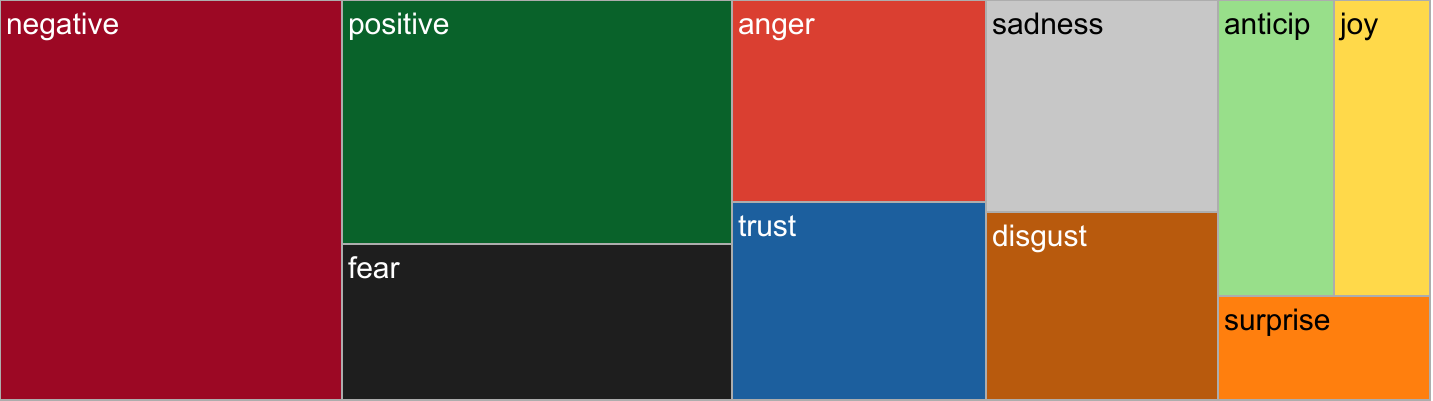

## 六、情感分析结果展示与数据可视化
### 1.pandas库与matplotlib介绍:
>Python Data Analysis Library 或 pandas 是基于NumPy 的一种工具，该工具是为了解决数据分析任务而创建的。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的工具。pandas提供了大量能使我们快速便捷地处理数据的函数和方法。你很快就会发现，它是使Python成为强大而高效的数据分析环境的重要因素之一。

>Matplotlib 是一个 Python 的 2D绘图库，它以各种硬拷贝格式和跨平台的交互式环境生成出版质量级别的图形。
### 2.运用pandas库读取excel数据
- <font size=3>运用pandas库中的 read_excel 函数读取数据.
- 运用matplotlib的pyplot方法，根据数据绘制饼图，实现情感成分的可视化。


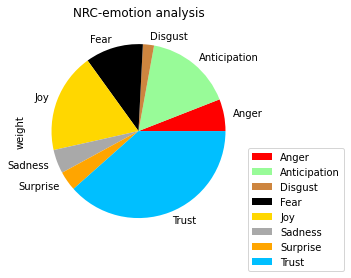

,emotion,weight
0,Anger,0.059361
1,Anticipation,0.161952
2,Disgust,0.020664
3,Fear,0.107528
4,Joy,0.185577
5,Sadness,0.044314
6,Surprise,0.036271
7,Trust,0.384334


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#读取存放在excel里面的文章的情感向量数据
df = pd.read_excel(r'C:\Users\Administrator\Desktop\python大作业\all_emotion.xls')

#为导出的饼图设置颜色，标签
colors=[ 'red', 'palegreen', 'peru', 'black','gold','darkgrey','orange','deepskyblue']
labels=['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust']

#导出饼图
df.plot(kind='pie',y='weight',legend='False',colors=colors,labels=labels)
plt.title('NRC-emotion analysis')#为饼图设置标题
plt.legend(labels, loc="best") 
plt.legend(labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)#设置图例位置，防止覆盖饼图
plt.show()#展示饼图
df#展示情感百分比

## 七、数据分析结果以及结论阐释

<font size=3>**从上文结果可以看出，前三位分别是trust、joy、aticipation。相对正面的情感成分居多，说明国外友人对《你好，李焕英》持肯定态度。**
    
- trust代表信任的情感，我认为其中应该包涵了国外友人对中国电影制作的赞赏与信心，以及对母爱亲情的美好歌颂——这是人类无国界，共通的情感。
    
- joy代表喜悦，这揭示了《你好，李焕英》作为喜剧的成功，能够感染大众。
    
- anticipation代表期待，这是国际友人对于中国的下一部更加优秀的作品的期待。